# Shap explainers and gradient-boosting trees

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostRegressor


https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules

# Numerical Example

In [5]:
df = pd.read_csv("/Users/vicmoreno/Documents/GitHub/QSS45/house-prices-advanced-regression-techniques/train.csv")
df1 = numerical_df = df.select_dtypes(include=['number'])

In [7]:
df1.shape

(1460, 38)

In [15]:
df1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
X = df1[df1.columns[:-1]]
y = df1.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1,
                                   depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set=(X_test,y_test),
                   plot=True)

# Make predictions
y_pred = catboost_model.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Shap analysis

In [10]:
# Explain predictions with SHAP
explainer = shap.Explainer(catboost_model, X_train)
shap_values = explainer(X_test)

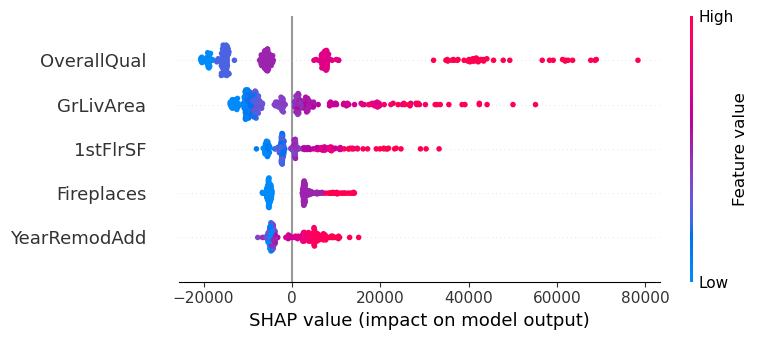

In [11]:
# Summary plot
shap.summary_plot(shap_values, X_test, max_display=5)

In [12]:
## greater overallqual--greater correlation w house price 
## grlivarea-- newer = move expensive 

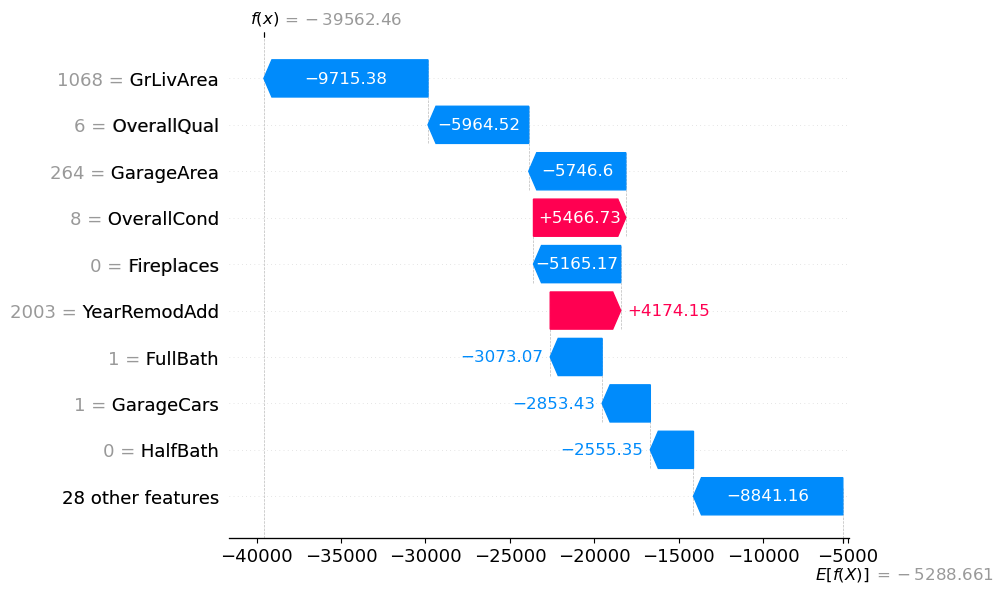

In [13]:
# Waterfall plot for a single observation
shap.plots.waterfall(shap_values[0])

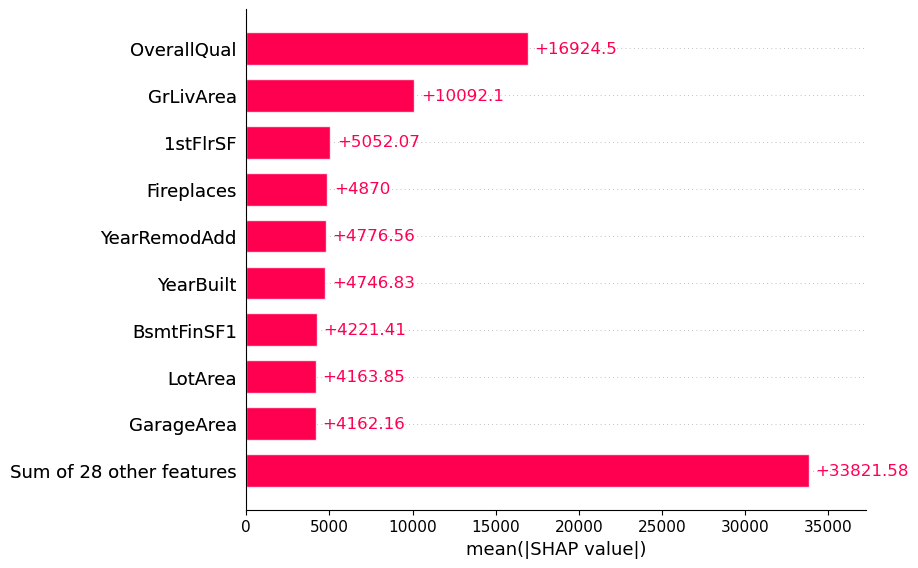

In [14]:
shap.plots.bar(shap_values)

More plots available: https://shap.readthedocs.io/en/latest/generated/shap.plots.bar.html

## Your turn

First, plot the correlation of the outputs with the actual home sale prices.

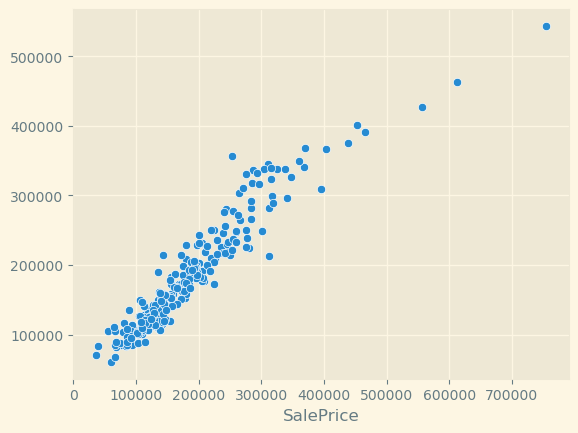

In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.scatterplot(x=y_test, y=y_pred)
plt.style.use('Solarize_Light2')

## Next, add in the categorical variables then train a new CatBoost model. Run this through SHAP
What do you observe? What are the top variables now?

In [31]:
df.select_dtypes('object') 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [98]:
categorical_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=['number'])

categorical_features = list(categorical_df.columns)

categorical_df.fillna("NA", inplace = True)

df = pd.concat([categorical_df, numerical_df], axis = 1)
X = df[df.columns[:-1]]
y = df.SalePrice

In [92]:
df_cats = ['Street','LotShape','LandContour','Utilities','LotConfig','Neighborhood']
X = df[df_cats]
X.fillna('NA', inplace=True)
y = df.SalePrice

/var/folders/3f/t59vtj796q5bjl4slmbv42f40000gn/T/ipykernel_71167/47659386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna('NA', inplace=True)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1,
                                   depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set=(X_test,y_test),
                   cat_features =categorical_features ,
                   plot=True)

# Make predictions
y_pred = catboost_model.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [103]:
# Explain predictions with SHAP
explainer = shap.TreeExplainer(catboost_model, feature_perturbation="tree_path_dependent")
shap_values = explainer(X_test) 


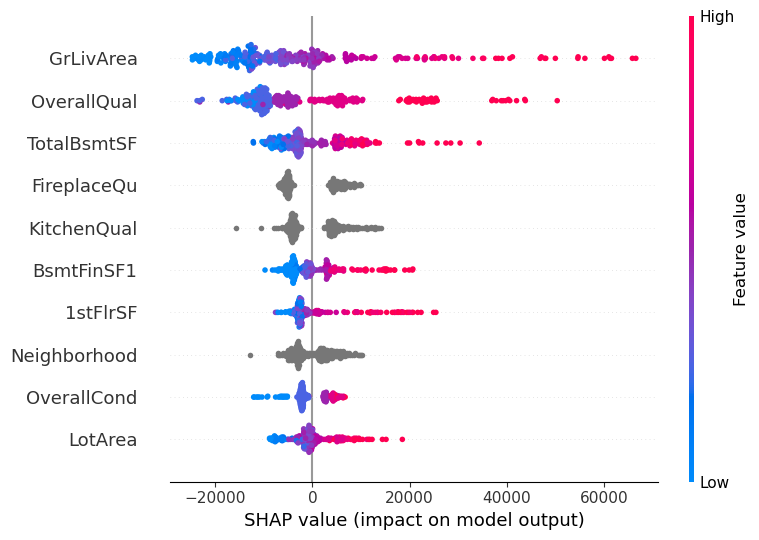

In [105]:
# Summary plot
shap.summary_plot(shap_values, X_test, max_display=10)
plt.style.use('default')

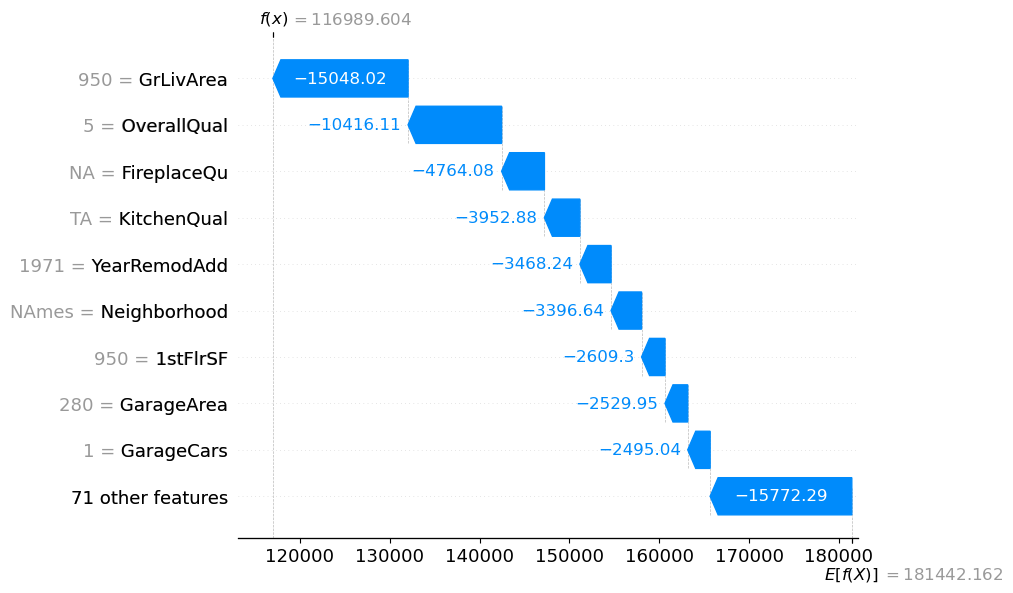

In [107]:
shap.plots.waterfall(shap_values[42])

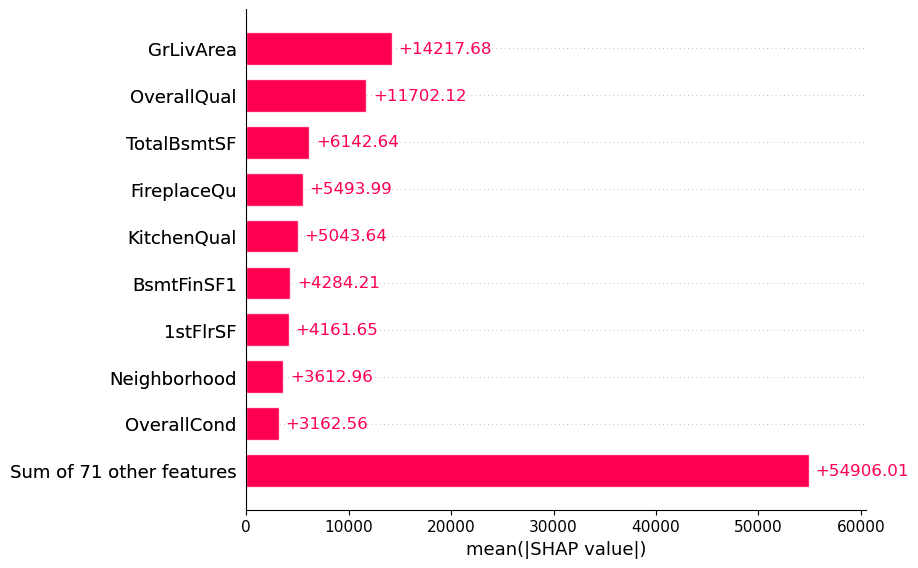

In [106]:
shap.plots.bar(shap_values)